In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import cov
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from yellowbrick.classifier import ClassificationReport
from sklearn.naive_bayes import GaussianNB

In [15]:
data=pd.read_csv("student-mat.csv")
data.shape
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1,G2,G3,health1,studytime1,studytime2,studytime_up
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,3,6,5,6,6,0,0,low,BTWOANDFIVE
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,3,4,5,5,6,0,0,low,BTWOANDFIVE
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,3,10,7,8,10,0,0,low,BTWOANDFIVE
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,5,2,15,14,15,1,1,high,BFIVEANDTEN
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,5,4,6,10,10,1,0,low,BTWOANDFIVE


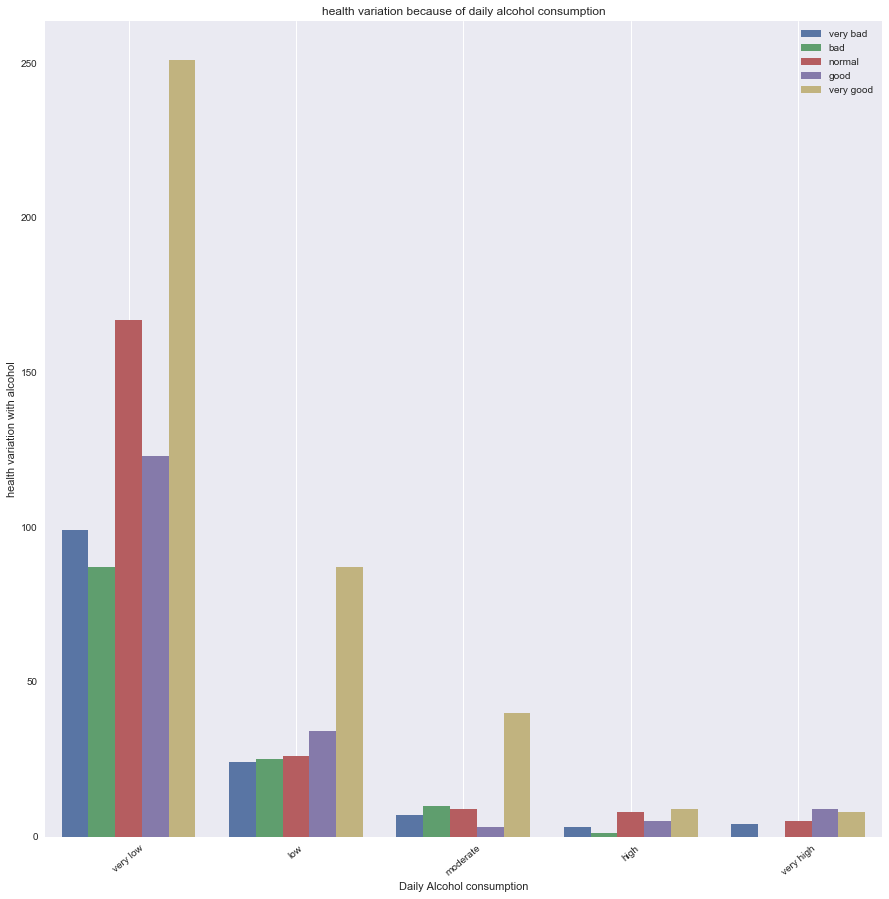

In [23]:
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(15,15)})
sns.countplot('Dalc',data=data,hue = 'health')
#health- 1-very bad 5-very good
#dalc - 1-very low 5-very high
plt.xlabel("Daily Alcohol consumption")
plt.ylabel("health variation with alcohol")
plt.title("health variation because of daily alcohol consumption")
plt.grid()
labels=['very bad','bad','normal','good','very good']
s=['very low','low','moderate','high','very high']
x=np.arange(len(s))
plt.xticks(x,s,rotation=40)
plt.legend(labels)

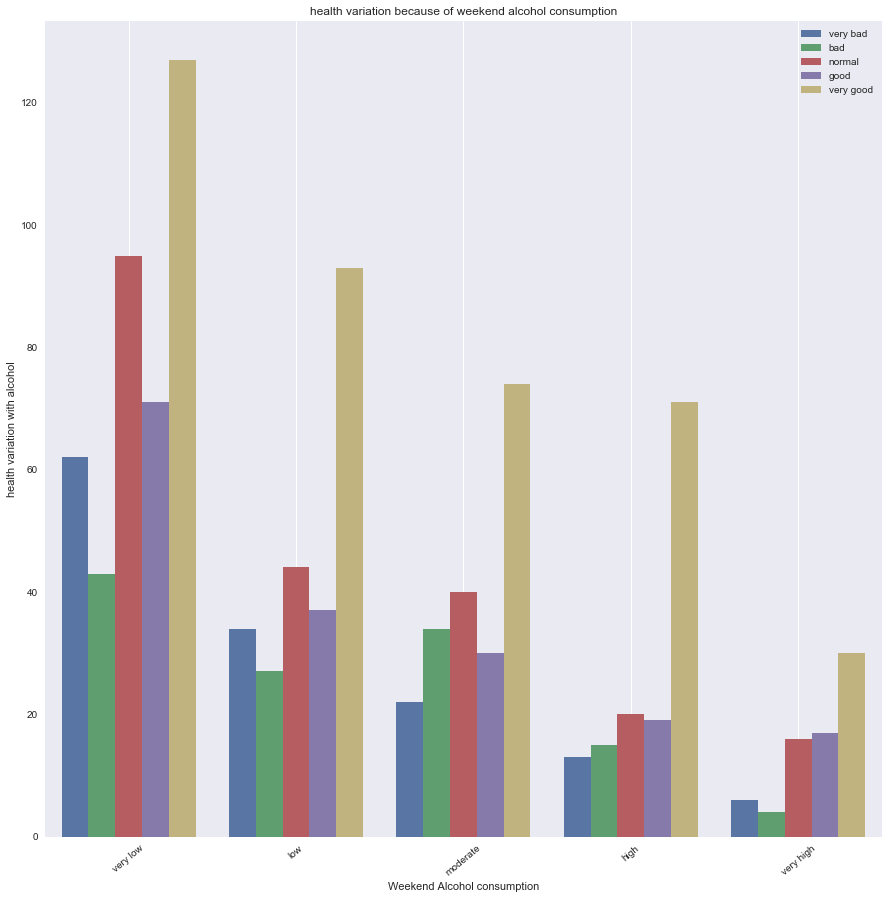

In [22]:
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(15,15)})
sns.countplot('Walc',data=data,hue = 'health')
plt.xlabel("Weekend Alcohol consumption")
plt.ylabel("health variation with alcohol")
plt.title("health variation because of weekend alcohol consumption")
plt.grid()
labels=['very bad','bad','normal','good','very good']
s=['very low','low','moderate','high','very high']
x=np.arange(len(s))
plt.xticks(x,s,rotation=40)
plt.legend(labels)

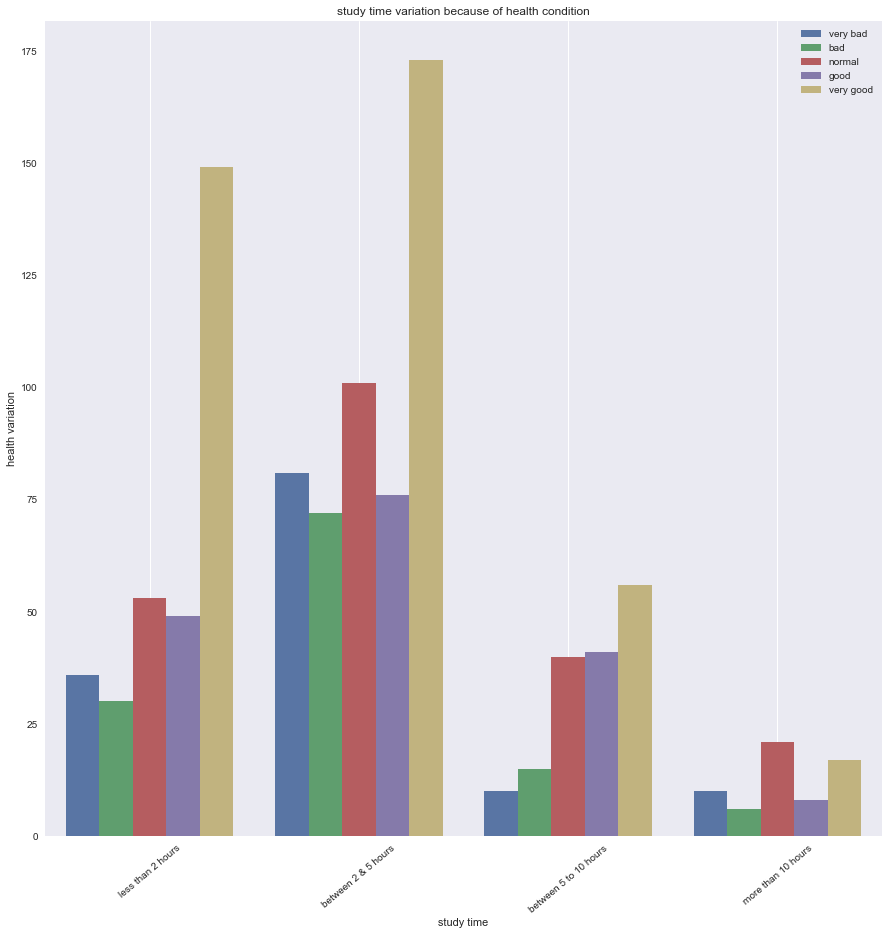

In [24]:
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(15,15)})
sns.countplot('studytime',data=data,hue = 'health')
plt.xlabel("study time")
plt.ylabel("health variation")
plt.title("study time variation because of health condition")
plt.grid()
labels=['very bad','bad','normal','good','very good']
s=['less than 2 hours','between 2 & 5 hours','between 5 to 10 hours','more than 10 hours']
x=np.arange(len(s))
plt.xticks(x,s,rotation=40)
plt.legend(labels)
#health- 1-very bad 5-very good
#1- less than 2, 2- 2 to 5, 3-5 to 10, 4- >10

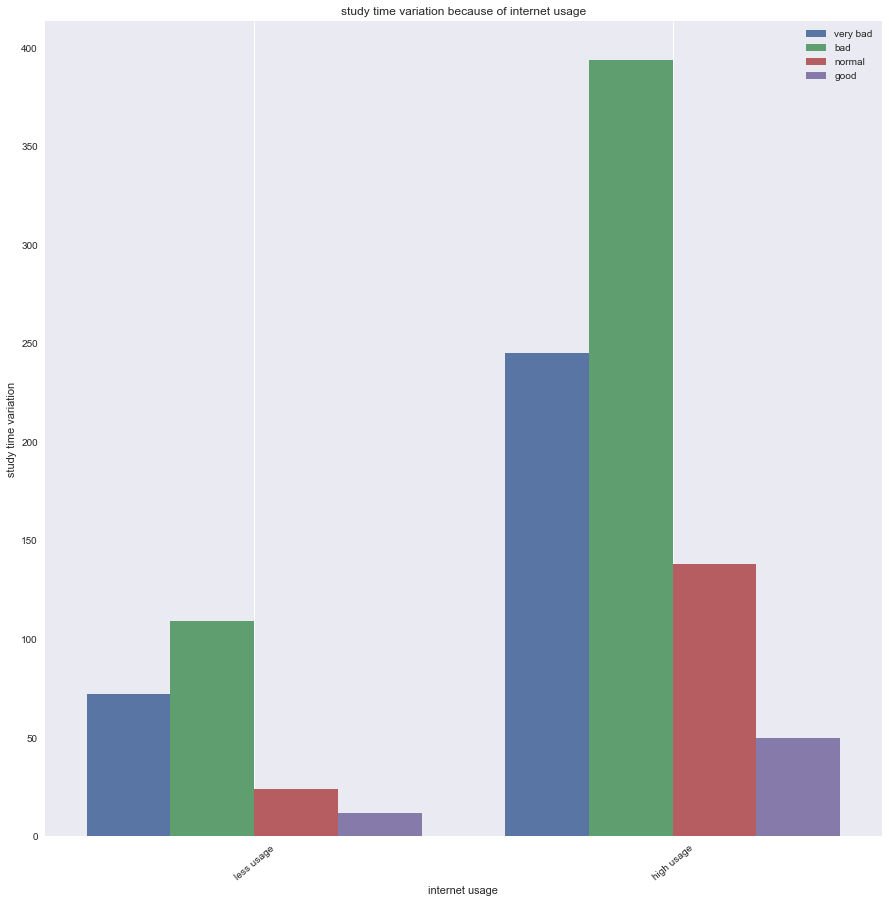

In [25]:
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(15,15)})
sns.countplot('internet',data=data,hue = 'studytime')
plt.xlabel("internet usage")
plt.ylabel("study time variation")
plt.title("study time variation because of internet usage")
plt.grid()
labels=['very bad','bad','normal','good','very good']
s=['less usage','high usage']
x=np.arange(len(s))
plt.xticks(x,s,rotation=40)
plt.legend(labels)

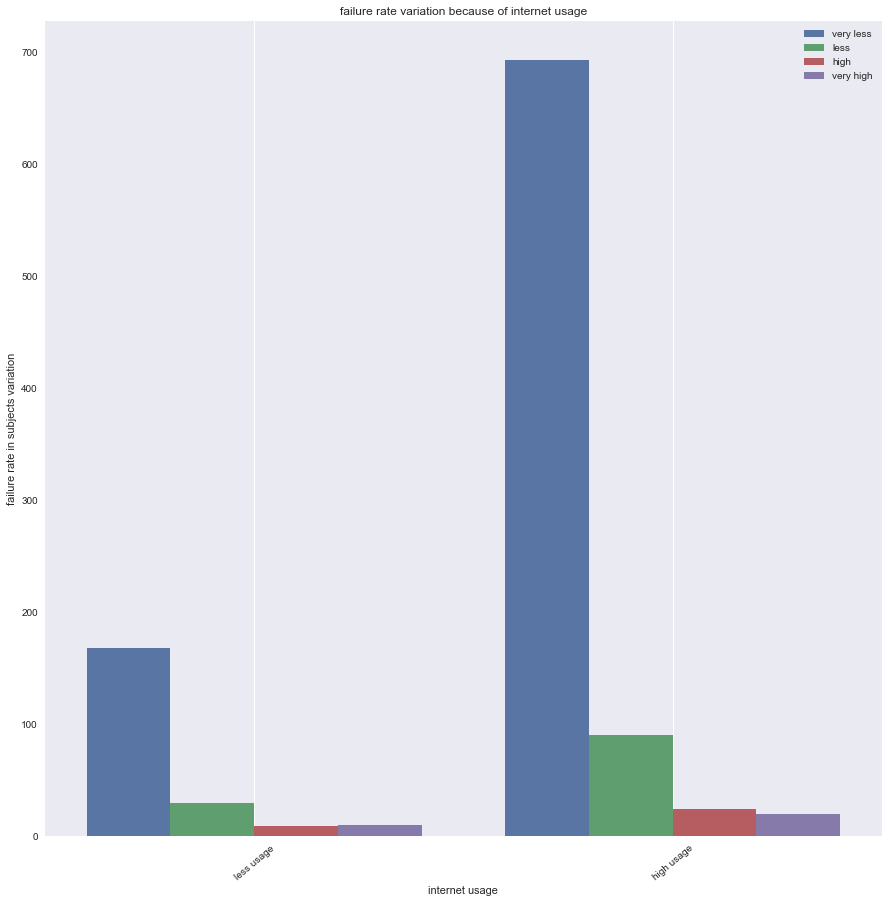

In [26]:
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(15,15)})
sns.countplot('internet',data=data,hue = 'failures')
plt.xlabel("internet usage")
plt.ylabel("failure rate in subjects variation")
plt.title("failure rate variation because of internet usage")
plt.grid()
labels=['very less','less','high','very high']
s=['less usage','high usage']
x=np.arange(len(s))
plt.xticks(x,s,rotation=40)
plt.legend(labels)

In [30]:
le=LabelEncoder()
d1=pd.read_csv("student-mat.csv")
d1['internet']=le.fit_transform(d1['internet'])
d1['studytime2']=le.fit_transform(d1['studytime2'])
d1['internet']=d1['internet'].astype(float)
d1['studytime2']=d1['studytime2'].astype(float)
covariance = cov(d1['internet'],d1['studytime2'])
covariance

array([[ 0.16480881, -0.01012405],
       [-0.01012405,  0.16868523]])

In [32]:
cols=['internet','failures']
y=data['studytime1'] #1- very bad,2-bad,3-moderate,4-good, 5- very good
features=data[cols]
features['internet']=le.fit_transform(features['internet'])
features

C:\Users\jaya tanwani\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,internet,failures
0,0,0
1,1,0
2,1,3
3,1,0
4,0,0
5,1,0
6,1,0
7,0,0
8,1,0
9,1,0


In [38]:
data_train, data_test, target_train, target_test = train_test_split(features,y, test_size = 0.30, random_state = 10)
gnb = GaussianNB()
pred = gnb.fit(data_train, target_train).predict(data_test)
print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred, normalize = True))
print(classification_report(target_test, pred))
print(confusion_matrix(target_test, pred))

Naive-Bayes accuracy :  0.7579617834394905
             precision    recall  f1-score   support

          0       0.76      1.00      0.86       238
          1       0.00      0.00      0.00        76

avg / total       0.57      0.76      0.65       314

[[238   0]
 [ 76   0]]


C:\Users\jaya tanwani\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [39]:
cols=['internet','failures']
X=data[cols]
y=data['studytime2']
X['internet']=le.fit_transform(data['internet'])
model = DecisionTreeClassifier()
model.fit(X,y)

C:\Users\jaya tanwani\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [40]:
predictions=model.predict(X)
predictions

array(['low', 'low', 'low', ..., 'low', 'low', 'low'], dtype=object)

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
model.fit(X_train,y_train)
predictions1= model.predict(X_test)
score= accuracy_score(y_test,predictions1)
score

0.84688995215311

In [47]:
# visualization of our decision tree
from sklearn import tree
# tree is a method for exploring our decision tree in a graphical format
dot_data =tree.export_graphviz(model,out_file='behaviour.dot'
                     ,feature_names=['internet','failures']
                     ,class_names=sorted(y.unique())
                     ,label='all',rounded=True
                     ,filled=True)